**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, pairwise_distances

from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.neighbors import KDTree

import matplotlib.pyplot as plt
%matplotlib inline

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric="euclidean"):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.algorithm = algorithm
            
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X_train = X.copy()
        elif self.algorithm == 'kd_tree':
            self.Tree = KDTree(X, leaf_size=2, metric=self.metric)
        self.Y_train = y.copy()
    
    def predict(self, X):
        if self.algorithm == 'brute':
            DistMatr = pairwise_distances(X, self.X_train, self.metric) # в KNeighborsClassifier используется метрика Минковского 
            indices = np.argpartition(DistMatr, self.n_neighbors, axis=1)[:,:self.n_neighbors] #с параметром p = 2, это есть евклидова метрика
        elif self.algorithm == 'kd_tree':
            _, indices = self.Tree.query(X, k=self.n_neighbors)
        Y_train_reduce = np.take(self.Y_train, indices) 
        Y_pred = mode(Y_train_reduce, axis=1)[0].ravel()
        return Y_pred
            
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 1.26 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 42.4 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 2.68 ms, sys: 0 ns, total: 2.68 ms
Wall time: 3.3 ms


array([1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 2.2 ms, sys: 40 µs, total: 2.24 ms
Wall time: 2.38 ms


array([1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.2 ms, sys: 38 µs, total: 1.24 ms
Wall time: 1.02 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 302 µs, sys: 60 µs, total: 362 µs
Wall time: 336 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 1.97 ms, sys: 779 µs, total: 2.75 ms
Wall time: 2.6 ms


array([2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 2.41 ms, sys: 0 ns, total: 2.41 ms
Wall time: 2.18 ms


array([2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vectorizer = CountVectorizer(max_df=0.035, min_df=0.001)
X_vectorizer = count_vectorizer.fit_transform(data)
X_vectorizer = X_vectorizer.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import KFold

In [24]:
def validation_KFold_3(n_neighbors, algorithm, metric, X):
    kf = KFold(n_splits=3, shuffle=True, random_state=2020)
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        cur_accuracy_score = accuracy_score(y_test, my_clf_pred)
        accuracy_list.append(cur_accuracy_score)
    return sum(accuracy_list) / len(accuracy_list)
     

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [25]:
def find_best_n_neighbors(X, algorithm, metric):
  accur_score, max_accuracy, n_neighbors = [], 0, 0
  for i in range(1, 11):
      accur_score.append(validation_KFold_3(i, algorithm, metric, X))
      if accur_score[-1] > max_accuracy:
          max_accuracy = accur_score[-1]
          n_neighbors = i
  return accur_score, n_neighbors
  


In [26]:
accur_score_CV_euclid, neighbors_CV_euclid = find_best_n_neighbors(X_vectorizer, "brute", "euclidean")

In [27]:
print("CountVectorizer | brute | euclidean metric:\n", *accur_score_CV_euclid, "\nBest n_neighbors:\n", neighbors_CV_euclid)

CountVectorizer | brute | euclidean metric:
 0.3032526511837703 0.2379354066620117 0.2519009840404516 0.2507519572964745 0.2502212190500723 0.2478346545078678 0.24429915695857177 0.239703260890656 0.23537261677483434 0.23413498523972132 
Best n_neighbors:
 1


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [28]:
accur_score_CV_cos, neighbors_CV_cos = find_best_n_neighbors(X_vectorizer, "brute", "cosine")

In [29]:
print("CountVectorizer | brute | cosine metric:\n", *accur_score_CV_cos, "\nBest n_neighbors:\n", neighbors_CV_cos)

CountVectorizer | brute | cosine metric:
 0.5275759153945868 0.49080705958731957 0.5167041473603834 0.5397728417808546 0.556124468148628 0.5661121333118488 0.5701779941600046 0.575215929946301 0.5816680506917828 0.5841427982091382 
Best n_neighbors:
 10


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer_Tfid = TfidfVectorizer(max_df=0.035, min_df=0.001)
X_Tfid = vectorizer_Tfid.fit_transform(data)
X_Tfid = X_Tfid.toarray()

In [32]:
accur_score_Tfid_euclid, neighbors_Tfid_euclid = find_best_n_neighbors(X_Tfid, "brute", "euclidean")

In [33]:
print("TfidfVectorizer | brute | euclidean metric:\n", *accur_score_Tfid_euclid, "\nBest n_neighbors:\n", neighbors_Tfid_euclid)

TfidfVectorizer | brute | euclidean metric:
 0.1708508000302583 0.10668225417337707 0.1145483255358305 0.11012900632620866 0.10535639279467057 0.10438450533030114 0.10155583076705176 0.09828535082763579 0.096694167194171 0.0950148474539984 
Best n_neighbors:
 1


In [34]:
accur_score_Tfid_cos, neighbors_Tfid_cos = find_best_n_neighbors(X_Tfid, "brute", "cosine")

In [35]:
print("TfidfVectorizer | brute | cosine metric:\n", *accur_score_Tfid_cos, "\nBest n_neighbors:\n", neighbors_Tfid_cos)

TfidfVectorizer | brute | cosine metric:
 0.5550640461957869 0.5244821060503504 0.5539148319780386 0.5791046983832918 0.5948377081743907 0.6057973545388666 0.6101280923915738 0.6127803072676363 0.6199392978676077 0.6245354985804018 
Best n_neighbors:
 10


In [36]:
import matplotlib.ticker as ticker

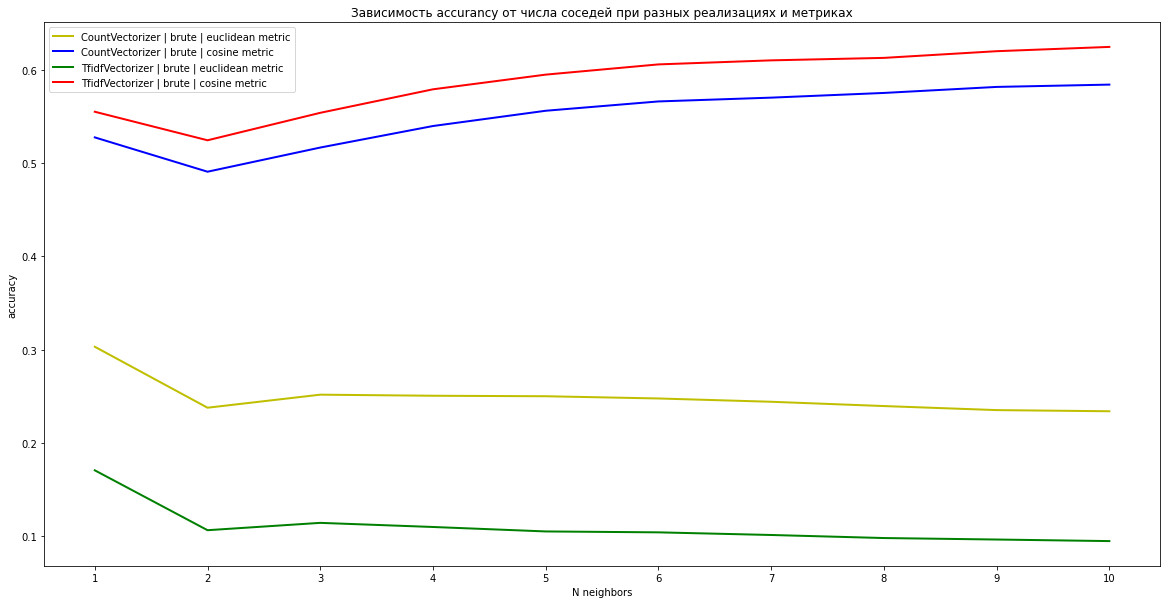

In [37]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax = fig.add_subplot()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title("Зависимость accurancy от числа соседей при разных реализациях и метриках")
ax.plot(list(range(1, 11)), accur_score_CV_euclid, color='y', linewidth=2.0, label="CountVectorizer | brute | euclidean metric")
ax.plot(list(range(1, 11)), accur_score_CV_cos, color='b', linewidth=2.0, label="CountVectorizer | brute | cosine metric")
ax.plot(list(range(1, 11)), accur_score_Tfid_euclid, color='g', linewidth=2.0, label="TfidfVectorizer | brute | euclidean metric")
ax.plot(list(range(1, 11)), accur_score_Tfid_cos, color='r', linewidth=2.0, label="TfidfVectorizer | brute | cosine metric")
ax.set_ylabel('accuracy')
ax.set_xlabel('N neighbors')
ax.legend()


****Небольшой анализ полученного графика****

Лучшее результаты показывает модель с косинусной (т.к. в этом случае мы сравниваем, насколько похожи слова, а не "близки" друг другу) метрикой и Tfidf- векторизацией. Причём результаты тем лучше, чем больше соседей рассматривается. (Возможно стоит увеличить количество соседей еще и посмотреть на результаты на тестовой выборке). Данными суждениями по виду графиков была выбрана модель для тестовой выборки.

~Методом научного тыка~Эмпирическим способом было установлено, что accuracy увеличивается (почти для любого числа соседей) при уменьшении параметров max_df и min_df. Минимальные их значение, установка коих не приводит к непозволительно долгой работе, равны соответственно 0.035 и 0.001. Таким образом мы достаточно резко убираем слова, которые встречаются очень часто и очень-очень-очень редко.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [38]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [39]:
data_test = newsgroups['data']
target_test = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [40]:
X_test = vectorizer_Tfid.transform(data_test)
X_test = X_test.toarray()


In [41]:
my_clf_best = MyKNeighborsClassifier(10, "brute", "cosine")
my_clf_best.fit(X_Tfid, target)
test_pred = my_clf_best.predict(X_test)
res_score = accuracy_score(target_test, test_pred)

In [42]:
print("Итоговый скор =", res_score)

Итоговый скор = 0.5602761550716941


Видимо, нам нужно запустить еще и кросс-валидацию. Запускаем:

(Немного поправляем функцию, т.к. считать нужно по target_test)


In [43]:
def validation_KFold_3(n_neighbors, algorithm, metric, X):
    kf = KFold(n_splits=3, shuffle=True, random_state=2020)
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target_test[train_index], target_test[test_index]
        my_clf = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        cur_accuracy_score = accuracy_score(y_test, my_clf_pred)
        accuracy_list.append(cur_accuracy_score)
    return sum(accuracy_list) / len(accuracy_list)
     

In [44]:
cross_val_score = validation_KFold_3(10, "brute", "cosine", X_test)
print("Скор на кросс-валидации =", cross_val_score)

Скор на кросс-валидации = 0.6117913055067663


Качество отличается. Скорее всего, это связано с тем,  что наборы слов в train и test части могут отличаться, к тому же свою роль сыграло переобучение.

Посмотрим, что случится, если увеличить количество рассматриваемых соседей:

In [45]:
res_list = []
for i in range(10, 101, 10):
    my_clf_best = MyKNeighborsClassifier(i, "brute", "cosine")
    my_clf_best.fit(X_Tfid, target)
    test_pred = my_clf_best.predict(X_test)
    res_list.append(accuracy_score(target_test, test_pred))

Text(0.5, 0, 'N neighbors')

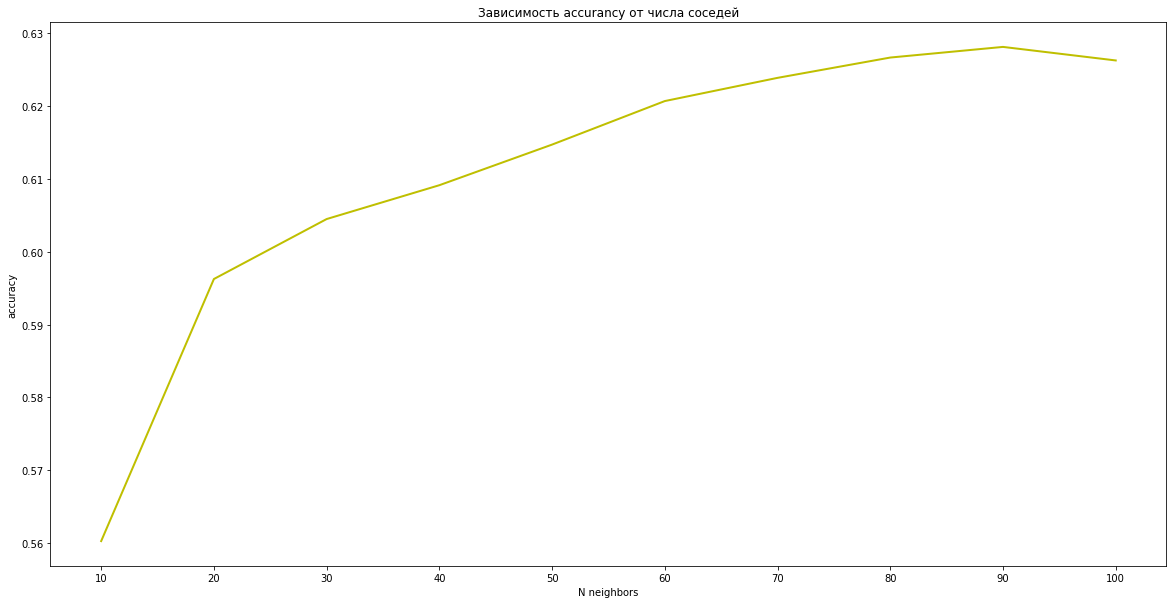

In [48]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax = fig.add_subplot()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title("Зависимость accurancy от числа соседей")
ax.plot(list(range(10, 101,10)), res_list, color='y', linewidth=2.0)
ax.set_ylabel('accuracy')
ax.set_xlabel('N neighbors')

Из графика видно, что при увеличении количества соседей увеличивается скор. Однако после 90 соседей скор не сильно улучшается(даже ухудшается). Посмотрим кросс-валидацию на самом лучшем количестве соседей:

In [49]:
cross_val_score_best = validation_KFold_3(90, "brute", "cosine", X_test)

In [51]:
print("Итоговый скор =", res_list[-2] ,"Кросс-валидация =",cross_val_score_best)

Итоговый скор = 0.6281200212426978 Кросс-валидация = 0.6291829892695248


Можно сделать вывод, что при увеличении количества соседей (до некоторого значения, пока их не становится слишком много для действительно ближайших), скор увеличивается и значительно меньше отличается от кросс - валидации. Вероятнее всего, это связано с меньшим переобучением. 